<h1>交差検証データ（Cross validation set）</h1>


* データを訓練データ（Training set）とテストデータ（Test set）に分ける。この比率は7:3とする

<img width=500 src="https://camo.qiitausercontent.com/f9842626d58d00808fd333654cfd17fb79920dd7/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3132323335342f66333833343030382d313265362d393438622d613962372d3966346239626638613939312e706e67">


* 正則化のパラメーター$λ$や、$x^2, x^3, \dots$などモデルの次数を調整する場合は、データを訓練データ、交差検証データ（Cross validation set）、テストデータに分ける。この場合の比率は$6:2:2$とする。

<img width=500 src="https://camo.qiitausercontent.com/3b3055122ba077b434a8d50bfd8fa6ac0faa836d/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3132323335342f63363936373364622d343866372d326362362d346435662d6135316364396661366161372e706e67">


* モデルのパラメーター$Θ$（回帰分析の場合は切片や係数の値）は訓練データを用いて計算する。つまり$Θ$は訓練データにおける誤差関数$J_{train}(\Theta)$を最小化するように定められる。


* 訓練データで求めた$\Theta$を、交差検証データに代入し求めた誤差を$J_{CV}(\Theta)$、テストデータに代入したものを$J_{test}(\Theta)$とする。



* $J_{train}(\Theta)$と$J_{CV}(\Theta)$のグラフを描く。正則化や次数のパラメーターの最適化がない場合は、$J_{CV}(\Theta)$を$J_{test}(\Theta)$と読み替えてよい。

Training error:	$J_{train}(\theta) = \frac{1}{2m}\sum_\limits{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2$

Cross Validation error:	$J_{cv}(\theta) = \frac{1}{2m_{cv}}\sum_\limits{i=1}^{m}(h_{\theta}(x^{(i)}{cv})-y^{(i)}{cv})^2$

<img src="https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/64ad47693447761bd005243ae7db0cca.png">



<img src="https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/25597f0f88208a7e74a3ca028e971852.png">

* <b>$J_{train}(\Theta)$も$J_{cv}(\Theta)$も高い状態→アンダーフィッティング</b>
* <b>$J_{train}(\Theta)$は低いが、$J_{cv}(\Theta)$は高い状態→オーバーフィッティング</b>


<hr/>
<h1>正規化パラメータ$λ$ (regularization parameter)</h1>

$\large J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_\theta (x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m} \sum^m_{j=1} \theta_j^2$


<img src="https://camo.qiitausercontent.com/b45250c9bced2dafc52bad85220c9e131fb3d6e0/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3132323335342f38656632356561322d303164382d323661312d386634322d6330616362396132353230342e706e67">


<b>その他</b>

■アンダーフィット（高バイアス）を直したい

* 別の説明変数 (feature)を探す
* 多項変数 $x_1^2, x_2^2, x_1x_2$などを追加する
* 正規化パラメーター$λ$を小さくする

■オーバーフィット（高バリアンス）を直したい
* トレーニングデータ数を増やす
* 説明変数 (feature)を減らす
* 正規化パラメーター$λ$を大きくする

<hr/>
<h1>適合率 (Precision)、再現率 (Recall)</h1>

<img width=500 src="https://camo.qiitausercontent.com/838eb9287d9e662cbe56360ed0c7483d205d837d/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3130323338372f37386439363832322d326332372d616130612d313962312d3139616435636566656366612e706e67">



<img width=500 src="https://camo.qiitausercontent.com/d3b4838bbb00ae87dfaf1a46e8674637c88aa28e/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3130323338372f37633833376439322d376562372d663562632d363935392d3566306439346238303239312e706e67">

In [3]:
import numpy as np
import matplotlib 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import Series,DataFrame

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
print(np.version.full_version)
print(matplotlib.__version__)
print(pd.__version__)

1.15.4
2.1.1
0.23.4


In [6]:
# 無印＝訓練データ、val＝交差検証データ、test＝テストデータ
X = np.array([-15.9368,-29.1530,36.1895,37.4922,-48.0588,-8.9415,15.3078,-34.7063,1.3892,-44.3838,7.0135,22.7627])
Xtest = np.array([-33.3180,-37.9122,-51.2069,-6.1326,21.2612,-40.3195,-14.5415,32.5598,13.3934,44.2099,-1.1427,-12.7669,34.0545,39.2235,1.9745,29.6218,-23.6696,-9.0118,-55.9406,-35.7086,9.5102])
Xval = np.array([-16.7465,-14.5775,34.5158,-47.0101,36.9751,-40.6861,-4.4720,26.5336,-42.7977,25.3741,-31.1096,27.3118,-3.2639,-1.8183,-40.7197,-50.0132,-17.4118,3.5882,7.0855,46.2824,14.6123])
y = np.array([2.1343,1.1733,34.3591,36.8380,2.8090,2.1211,14.7103,2.6142,3.7402,3.7317,7.6277,22.7524])
ytest = np.array([3.31689,5.39769,0.13043,6.19260,17.08849,0.79951,2.82479,28.62123,17.04639,55.38437,4.07937,8.27040,31.32355,39.15906,8.08728,24.11134,2.47735,6.56606,6.03809,4.69274,10.83005])
yval = np.array([4.1702e+000,4.0673e+000,3.1873e+001,1.0624e+001,3.1836e+001,4.9594e+000,4.4516e+000,2.2276e+001,-4.3874e-005,2.0504e+001,3.8583e+000,1.9365e+001,4.8838e+000,1.1097e+001,7.4617e+000,1.4769e+000,2.7192e+000,1.0927e+001,8.3487e+000,5.2782e+001,1.3357e+001])


Text(0,0.5,'Water flowing out of the dam (y)')

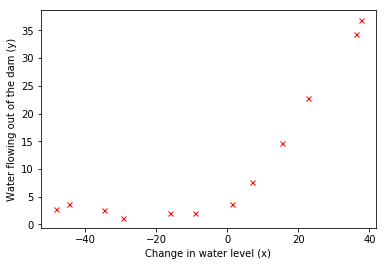

In [7]:
# 訓練データのプロット
plt.plot(X, y, "rx", ms=5)
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")

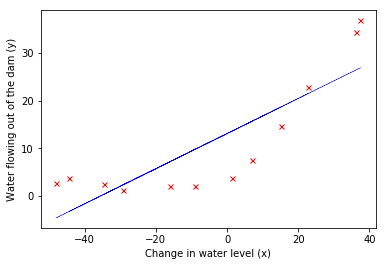

In [9]:
# 回帰分析
from sklearn.linear_model import Ridge

plt.plot(X, y, "rx", ms=5)
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
regr = Ridge(alpha = 0)#αはλと同じ
regr.fit(X.reshape(-1, 1), y)
plt.plot(X, regr.intercept_ + X * regr.coef_, "b--", linewidth=0.5)
plt.show()

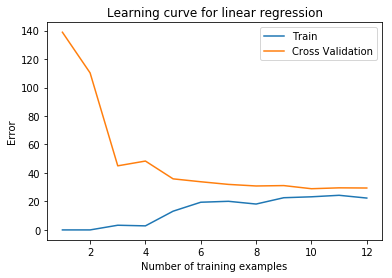

In [10]:
# Learning Curve
def learning_curve(X, y, Xval, yval, lambda_):
    m = X.shape[0]
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    regr = Ridge(alpha = lambda_)
    for i in range(m):
        if len(X.shape) == 1:
            regr.fit(X[:(i+1)].reshape(-1, 1), y[:(i+1)])
            error_train[i] = sum((regr.intercept_ + X[:(i+1)] * regr.coef_ - y[:(i+1)]) ** 2) / 2 / (i+1)
            error_val[i] = sum((regr.intercept_ + Xval * regr.coef_ - yval) ** 2) / 2 / len(yval)
        else:
            regr.fit(X[:(i+1)], y[:(i+1)])
            error_train[i] = sum((regr.intercept_ + np.dot(X[:(i+1), :], regr.coef_) - y[:(i+1)]) ** 2) / 2 / (i+1)
            error_val[i] = sum((regr.intercept_ + np.dot(Xval, regr.coef_) - yval) ** 2) / 2 / len(yval)
    return error_train, error_val


lambda_ = 0
m = X.shape[0]
error_train, error_val = learning_curve(X, y, Xval, yval, lambda_)
plt.plot(np.arange(1, m+1), error_train, label="Train")
plt.plot(np.arange(1, m+1), error_val, label="Cross Validation")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.title("Learning curve for linear regression")
plt.legend()
plt.show()

<b>多項式の変数を追加</b>

In [13]:
# 変数を多項式に拡張
def map_feature(X, p):
    m = X.shape[0]
    ret = np.zeros((m, p))
    for i in range(p):
        ret[:, i] = X ** (i+1)
    # 標準化
    mu = np.mean(ret, axis=0)
    sigma = np.std(ret, axis=0, ddof=1)#不偏分散で推定
    norm = (ret - mu) / sigma
    return norm, mu, sigma, ret
def map_feature_with_normalize(X, mu, sigma):
    p = len(mu)
    norm, d1, d2, poly = map_feature(X, p) #poly以外いらないので捨てる
    return (poly - mu) / sigma

In [17]:
# 訓練データ、交差検証データ、テストデータを多項式化
p = 8
X_poly, mu, sigma, dummy = map_feature(X, p)
X_poly_test = map_feature_with_normalize(Xtest, mu, sigma)
X_poly_val = map_feature_with_normalize(Xval, mu, sigma)

print(X.shape)
print(X_poly.shape)

(12,)
(12, 8)


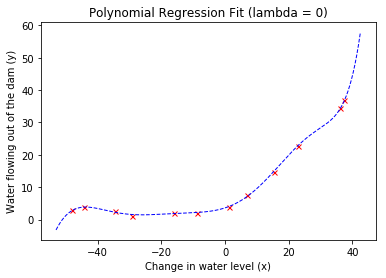

In [19]:
def plot_fit(min_x, max_x, mu, sigma, intercept, coef):
    x = np.arange(min_x - 5, max_x + 5, 0.05)
    x_poly = map_feature_with_normalize(x, mu, sigma)
    plt.plot(x, np.dot(x_poly, coef) + intercept, "b--", linewidth=1)
    
# 多項式によるオーバーフィッティングをプロット
lambda_ = 0
regr = Ridge(alpha=lambda_)
regr.fit(X_poly, y)

plt.plot(X, y, "rx", ms=5)
plot_fit(min(X), max(X), mu, sigma, regr.intercept_, regr.coef_)
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.title(f"Polynomial Regression Fit (lambda = {lambda_})")
plt.show()

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.2556632722594974e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.2039151490754586e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.

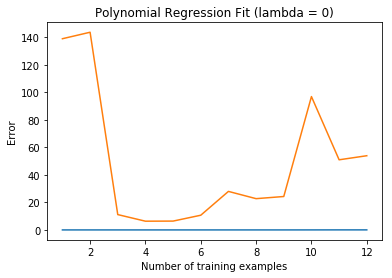

In [20]:
# 多項式の学習曲線
error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, lambda_)
plt.plot(np.arange(1, m+1), error_train, label="Train")
plt.plot(np.arange(1, m+1), error_val, label="Cross Validation")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.title(f"Polynomial Regression Fit (lambda = {lambda_})")
plt.show()


lambda		Train Error	Validation Error
0.0	0.028889756804223104	53.87832425671833
0.001	0.11269172092099948	9.839886446281232
0.003	0.17091634131480818	16.297345979884593
0.01	0.22149766018573072	16.94597695246843
0.03	0.28184870321853955	12.82890159831193
0.1	0.4593151824432687	7.587108155937717
0.3	0.9217549102562433	4.636926931005313
1.0	2.076180714082262	4.260709395467282
3.0	4.9013458026611465	3.8229413339059226
10.0	16.09221654444249	9.945473577441717


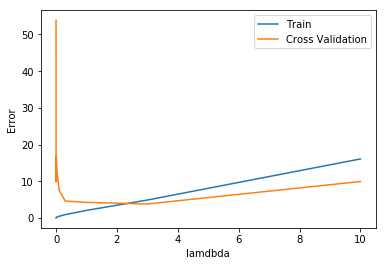

In [21]:
# 検証曲線
def validation_curve(X, y, Xval, yval):
    lambda_vec = np.array([0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10])
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))
    for i in range(len(lambda_vec)):
        regr = Ridge(alpha=lambda_vec[i])
        regr.fit(X, y)
        error_train[i] = np.sum((np.dot(X, regr.coef_) + regr.intercept_ - y) ** 2) / 2 / X.shape[0]
        error_val[i] = np.sum((np.dot(Xval, regr.coef_) + regr.intercept_ - yval) ** 2) / 2 / Xval.shape[0]
    return lambda_vec, error_train, error_val

lambda_vec, error_train, error_val = validation_curve(X_poly, y, X_poly_val, yval)

print()
print("lambda\t\tTrain Error\tValidation Error")
for l, et, ev in zip(lambda_vec, error_train, error_val):
    print(f"{l}\t{et}\t{ev}")

plt.plot(lambda_vec, error_train, label="Train")
plt.plot(lambda_vec, error_val, label="Cross Validation")
plt.xlabel("lamdbda")
plt.ylabel("Error")
plt.legend()
plt.show()

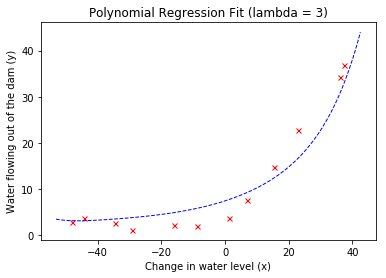

In [31]:
# 多項式によるオーバーフィッティングをプロット
lambda_ = 3
regr = Ridge(alpha=lambda_)
regr.fit(X_poly, y)

plt.plot(X, y, "rx", ms=5)
plot_fit(min(X), max(X), mu, sigma, regr.intercept_, regr.coef_)
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.title(f"Polynomial Regression Fit (lambda = {lambda_})")
plt.show()
